In [369]:
import numpy as np
import pandas as pd
import csv
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import pylab
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from scipy.stats import mode
import matplotlib.pyplot as plt

In [348]:
df = pd.read_csv('data/records_4000.tsv', sep='\t', index_col = 1)

In [349]:
df=df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
#df =df[['genre','tempo','key','duration','loudness','mode','end_of_fade_in','start_of_fade_out','time_signature']]
y=df['genre']
labels = list(set([label.strip() for label in y]))
X=df.drop(['genre'], axis=1)

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(x)


In [351]:
pca = PCA(n_components=5)
pca.fit(X_scaled)
newX = pca.transform(X)

In [352]:
sum(pca.explained_variance_ratio_) 

0.91949865782534101

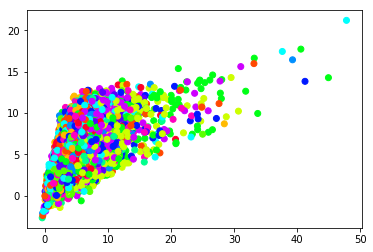

In [353]:
cm = plt.get_cmap('gist_rainbow')
plt.scatter([x[0] for x in newX],[x[1] for x in newX],c=[labels.index(lab.strip()) for lab in y], cmap=cm)
plt.show()

In [354]:
numcluster=len(labels)
kmeans = KMeans(n_clusters=numcluster, random_state=0).fit(newX)
thecluster=kmeans.labels_

In [355]:
clusters_assignment=[None]*len(labels)
cutoff=int(len(y)*0.6)
for i in range(0,cutoff):
    clusteridx=labels.index(y[i].strip())
    if(clusters_assignment[thecluster[i]]==None):
        clusters_assignment[thecluster[i]]=[]
    clusters_assignment[thecluster[i]]+=[clusteridx]
    
cluster_map=[None]*len(labels)
for i in range(0,len(labels)):
    cluster_map[i]=mode(clusters_assignment[i])[0][0]

In [356]:
y_number_train=[labels.index(lab.strip()) for lab in y[0:cutoff]]
cluster_assignment_train=[cluster_map[i] for i in thecluster[0:cutoff]]

y_number_test=[labels.index(lab.strip()) for lab in y[cutoff:]]
cluster_assignment_test=[cluster_map[i] for i in thecluster[cutoff:]]

In [357]:
def match(y_number,cluster_assignment):
    match=0
    for i in range(0,len(y_number)):
        if(y_number[i]==cluster_assignment[i]):
            match+=1;
    print "accuracy: "+str(match*1.0/len(X_scaled))

In [358]:
match(y_number_test,cluster_assignment_test)

accuracy: 0.0639807692308


In [359]:
match(y_number_train,cluster_assignment_train)

accuracy: 0.0984230769231


In [360]:
#without PCA
numcluster=len(labels)
kmeans = KMeans(n_clusters=numcluster, random_state=0).fit(X)
thecluster=kmeans.labels_
clusters_assignment=[None]*len(labels)
cutoff=int(len(y)*0.6)
for i in range(0,cutoff):
    clusteridx=labels.index(y[i].strip())
    if(clusters_assignment[thecluster[i]]==None):
        clusters_assignment[thecluster[i]]=[]
    clusters_assignment[thecluster[i]]+=[clusteridx]
    
cluster_map=[None]*len(labels)
for i in range(0,len(labels)):
    cluster_map[i]=mode(clusters_assignment[i])[0][0]
y_number_train=[labels.index(lab.strip()) for lab in y[0:cutoff]]
cluster_assignment_train=[cluster_map[i] for i in thecluster[0:cutoff]]

y_number_test=[labels.index(lab.strip()) for lab in y[cutoff:]]
cluster_assignment_test=[cluster_map[i] for i in thecluster[cutoff:]]

In [361]:
match(y_number_test,cluster_assignment_test)

accuracy: 0.0589807692308


In [362]:
match(y_number_train,cluster_assignment_train)

accuracy: 0.0881153846154


In [368]:
numcluster=len(labels)
nbrs=NearestNeighbors(n_neighbors=20, algorithm='ball_tree').fit(newX[0:cutoff])
distances, indices = nbrs.kneighbors(newX[cutoff:])

In [366]:
cluster_assignment_test=[]
for nbrs in indices:
    y_nbrs=[]
    for element in nbrs:
        y_nbrs+=[y_number_train[element]]
    cluster_assignment_test+=[mode(y_nbrs)[0][0]]

In [367]:
match(y_number_test,cluster_assignment_test)

accuracy: 0.0712884615385


In [370]:
confusion_matrix(y_number_test,cluster_assignment_test)

array([[424, 130, 171,  71,  78,  51, 129, 178,  97,  58,  64,  83,  46],
       [233, 348, 202,  96,  84,  42, 119, 136,  76,  67,  45,  99,  40],
       [188, 166, 429,  44, 186,  37, 126,  91,  68,  49,  90,  29,  85],
       [109,  52,  93, 358, 161, 242,  50,  54, 101,  43,  40, 208,  60],
       [102,  54, 209, 178, 431, 170,  47,  55,  85,  39,  97,  44,  92],
       [ 96,  54,  84, 342, 196, 386,  39,  49,  58,  48,  52, 109,  86],
       [262, 245, 238,  77,  82,  38, 170, 143, 119,  63,  50,  70,  53],
       [268, 198, 134,  85,  85,  36, 156, 315, 130,  64,  51,  80,  28],
       [260, 121, 150, 144, 116,  81, 104, 161, 152,  57,  63, 111,  43],
       [196, 192, 193, 133, 135, 100, 120, 136, 113,  69,  59, 107,  62],
       [175, 146, 240, 141, 226,  96,  93,  85,  80,  52,  84,  83,  80],
       [154, 131,  74, 264,  79, 118,  91, 110, 113,  56,  31, 407,  47],
       [151, 109, 230, 127, 260, 156, 102,  76,  73,  44,  81,  55, 134]])

In [380]:
y_number_test

[11,
 7,
 11,
 8,
 11,
 5,
 4,
 7,
 11,
 2,
 3,
 2,
 3,
 6,
 1,
 7,
 11,
 0,
 8,
 11,
 11,
 4,
 9,
 5,
 0,
 3,
 2,
 4,
 3,
 12,
 9,
 7,
 8,
 3,
 3,
 6,
 11,
 9,
 10,
 9,
 0,
 6,
 10,
 9,
 10,
 6,
 3,
 0,
 12,
 9,
 0,
 5,
 10,
 6,
 4,
 11,
 9,
 4,
 5,
 11,
 9,
 11,
 11,
 10,
 9,
 5,
 11,
 11,
 10,
 2,
 4,
 9,
 3,
 3,
 2,
 5,
 12,
 7,
 12,
 0,
 10,
 1,
 0,
 3,
 7,
 8,
 3,
 2,
 11,
 9,
 8,
 1,
 6,
 7,
 10,
 1,
 1,
 3,
 3,
 4,
 7,
 10,
 1,
 9,
 2,
 6,
 3,
 2,
 7,
 4,
 7,
 0,
 11,
 10,
 10,
 10,
 5,
 2,
 9,
 7,
 9,
 1,
 8,
 7,
 5,
 2,
 7,
 10,
 8,
 10,
 7,
 4,
 0,
 11,
 1,
 4,
 10,
 4,
 5,
 4,
 4,
 11,
 6,
 8,
 7,
 3,
 4,
 9,
 1,
 9,
 5,
 11,
 3,
 5,
 2,
 10,
 10,
 5,
 4,
 11,
 0,
 11,
 7,
 11,
 8,
 1,
 12,
 7,
 12,
 4,
 3,
 6,
 7,
 8,
 1,
 5,
 10,
 6,
 5,
 3,
 11,
 10,
 6,
 4,
 7,
 6,
 5,
 7,
 10,
 7,
 6,
 5,
 7,
 9,
 12,
 8,
 8,
 3,
 4,
 10,
 11,
 4,
 2,
 2,
 9,
 10,
 2,
 12,
 0,
 4,
 0,
 11,
 4,
 1,
 5,
 5,
 6,
 0,
 5,
 1,
 4,
 2,
 5,
 12,
 9,
 6,
 7,
 2,
 6,
 12,
 11,
 1,
 5,
 11,
 1,
 

In [387]:
X.shape

(52000, 18)